In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/train_and_test2.csv')
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [ ]:
target = '2urvived'
features = ['Sex','Fare','Pclass','Age', 'sibsp', 'Parch', 'Embarked']

In [ ]:
deleted_features = [
    f'zero.{i}' for i in range(17)
]
df.drop(columns=deleted_features, inplace=True, errors='ignore')

In [ ]:
cat_cols = ['Sex', 'Embarked']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
imputer = SimpleImputer(strategy='median')
df[features] = imputer.fit_transform(df[features])

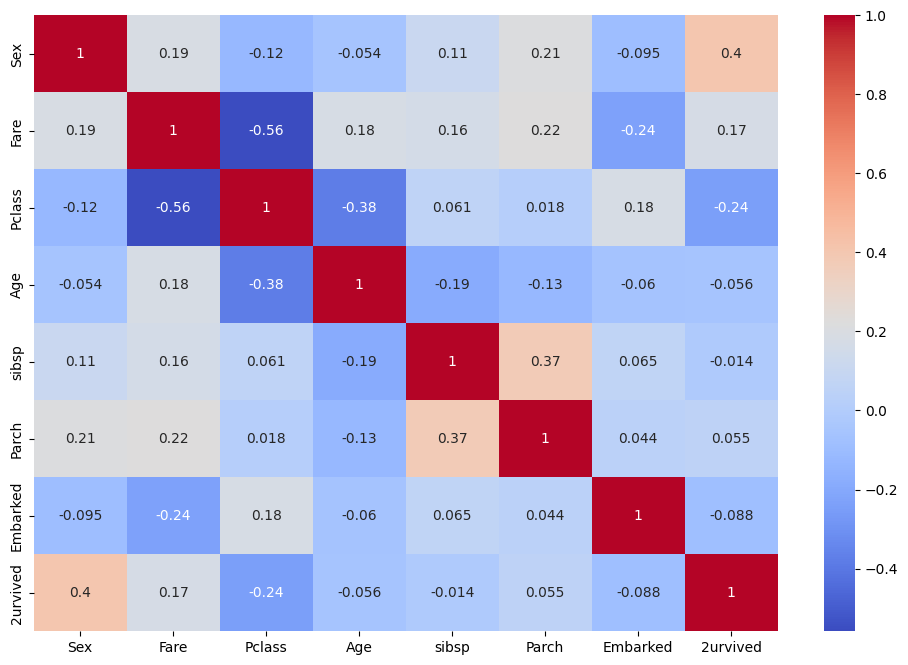

In [ ]:
corr_matrix = df[features + [target]].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
x = df[features]
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7099236641221374
Confusion Matrix:
 [[150  39]
 [ 37  36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       189
           1       0.48      0.49      0.49        73

    accuracy                           0.71       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.71      0.71      0.71       262



In [ ]:
output = pd.DataFrame({
    'PassengerId': df.loc[x_test.index, 'Passengerid'],
    'Survived': y_pred
})
output.to_csv('my_submission.csv', index=False)

print("Submission file saved as my_submission.csv")

Submission file saved as my_submission.csv
